In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds - 5.163[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds - 5.163[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: ../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[raw - samples 2,047]
(*) obs_samples: 65,174 - min_len: 6 - max_dur: 538.8[days] - dur(p50): 52.9[days] - cadence(p50): 1.0[days]
(g) obs_samples: 28,351 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 38.9[days] - cadence(p50): 3.0[days]
(r) obs_samples: 36,823 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 50.9[days] - cadence(p50): 3.0[days]
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | allSNII - 377/2,047 (18.42%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw_train - samples 1,431]
(*) obs_samples: 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: ../save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0/samplers.s


TypeError: 'NoneType' object is not iterable

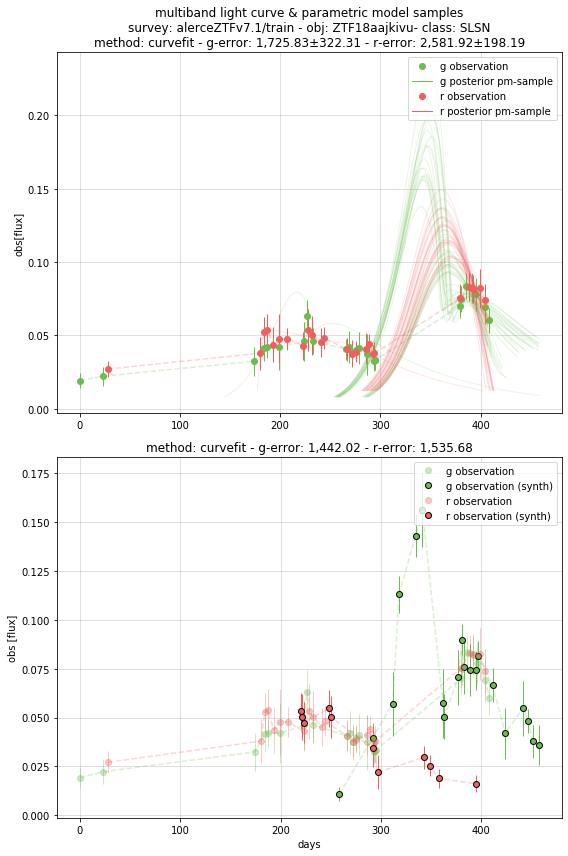

In [19]:
%load_ext autoreload
%autoreload 2
from synthsne.generators.synthetic_curves import get_syn_sne_generator
from synthsne.plots.lc import plot_synthetic_samples

save_rootdir = f'../save/{survey}/{cfilename}'
samplers = load_pickle(f'{save_rootdir}/samplers.s')
obse_sampler_bdict = samplers['obse_sampler_bdict']
length_sampler_bdict = samplers['length_sampler_bdict']
    
set_name = 'train'
#method = 'dummy'
method = 'curvefit'
#method = 'mcmc'

synthetic_samples_per_curve = 32

lcset = lcdataset[set_name]
lcobj_names = [
    'ZTF18aajkivu',
    'ZTF20aacbwbm',
    'ZTF19aaqrime',
    'ZTF19aafljiq',
    'ZTF19aamhhiz',
    'ZTF19abaeyqw',
]
for lcobj_name in lcobj_names:
#for lcobj_name in weird_lcobj_names:
    #lcobj_name = lc_set.get_random_lcobj_name() # random
    if not lcobj_name in lcset.get_lcobj_names():
        continue
    lcobj = lcset[lcobj_name]
    band_names = lcset.band_names
    class_names = lcset.class_names
    gen_kwargs = {
        #'uses_new_bounds':False,
        'uses_new_bounds':True,
    }
    generator_class = get_syn_sne_generator(method)
    sne_generator = generator_class(lcobj, class_names, band_names, obse_sampler_bdict, length_sampler_bdict, **gen_kwargs)
    new_lcobjs, new_smooth_lcojbs, trace_bdict = sne_generator.sample_curves(synthetic_samples_per_curve)
    plot_kwargs = {
        'trace_bdict':trace_bdict,
        #'save_filedir':f'../save/test_{lcobj_name}.png',
        'save_filedir':None,
    }
    plot_synthetic_samples(lcdataset, set_name, method, lcobj_name, new_lcobjs, new_smooth_lcojbs, **plot_kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)